In [1]:
from pydriller import Repository
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
repositorio = "https://github.com/Gnucash/gnucash.git"

In [3]:
commits = []

for commit in Repository(repositorio).traverse_commits():
    record = {
        'hash': commit.hash,
        'message': commit.msg,
        'author_name': commit.author.name,
        'author_email': commit.author.email,
        'author_date': commit.author_date,
        'committer_name': commit.committer.name,
        'committer_email': commit.committer.email,
        'committer_date': commit.committer_date,
       
            }
    commits.append(record)

# Save it to FileCommits.csv
df_commits = pd.DataFrame(commits)

In [4]:
df_commits.to_csv('DF Commits Gnucash.csv', index=False)

In [2]:
df_commits = pd.read_csv("DF Commits Gnucash.csv")

In [3]:
df_commits

,hash,message,author_name,author_email,author_date,committer_name,committer_email,committer_date
0,97d79a04686d358cbf56857d0756d8decb9ee136,New repository initialized by cvs2svn.\n\ngit-...,unknown user,unknown@gnucash.org,1997-11-01 01:39:32+00:00,unknown user,unknown@gnucash.org,1997-11-01 01:39:32+00:00
1,16684319530c39269135aa49eb4b6706ea0e61c3,Robin Clark's original xacc-0.9 source\n\n\ngi...,Linas Vepstas,linas@linas.org,1997-11-01 01:39:32+00:00,Linas Vepstas,linas@linas.org,1997-11-01 01:39:32+00:00
2,6737339f2934790f4930cd84de0cf1c4eb1f0b7b,linas quicken file format changes & other hack...,Linas Vepstas,linas@linas.org,1997-11-01 01:46:13+00:00,Linas Vepstas,linas@linas.org,1997-11-01 01:46:13+00:00
3,38d6cc079d290994c182b9716eed13e1591e16e8,more fixes & updates\n\n\ngit-svn-id: svn+ssh:...,Linas Vepstas,linas@linas.org,1997-11-01 01:57:30+00:00,Linas Vepstas,linas@linas.org,1997-11-01 01:57:30+00:00
4,1a6ffbe67291d018f276f5dc6f25ccb8c2f03f24,"mutual fund/stock stuff, first attempt\n\n\ngi...",Linas Vepstas,linas@linas.org,1997-11-01 02:00:51+00:00,Linas Vepstas,linas@linas.org,1997-11-01 02:00:51+00:00
...,...,...,...,...,...,...,...,...
29030,c63d2dcf6d227c8bff0848807a3e9445d23c9443,Imbalance fraction testing: Check all of the a...,John Ralls,jralls@ceridwen.us,2024-10-07 17:11:16-07:00,John Ralls,jralls@ceridwen.us,2024-10-07 17:11:16-07:00
29031,fef0124e45e0ec7ee053d858714acd2a0c317f83,Bug 799429 - Crash when changing accounting pe...,John Ralls,jralls@ceridwen.us,2024-10-08 16:44:32-07:00,John Ralls,jralls@ceridwen.us,2024-10-08 16:48:59-07:00
29032,3dd60e904c3445e1bb49cbfb3aff956724c6a838,Update webkit package for ubuntu-latest.,John Ralls,jralls@ceridwen.us,2024-10-12 09:28:28-07:00,John Ralls,jralls@ceridwen.us,2024-10-12 09:28:28-07:00
29033,5a71d7ad15fa3ba28e1e64e344e7827c3a19cfe0,Bug 799437 - Crash deleting and recreating an ...,Robert Fewell,14uBobIT@gmail.com,2024-10-14 12:08:25+01:00,Robert Fewell,14uBobIT@gmail.com,2024-10-14 12:08:25+01:00


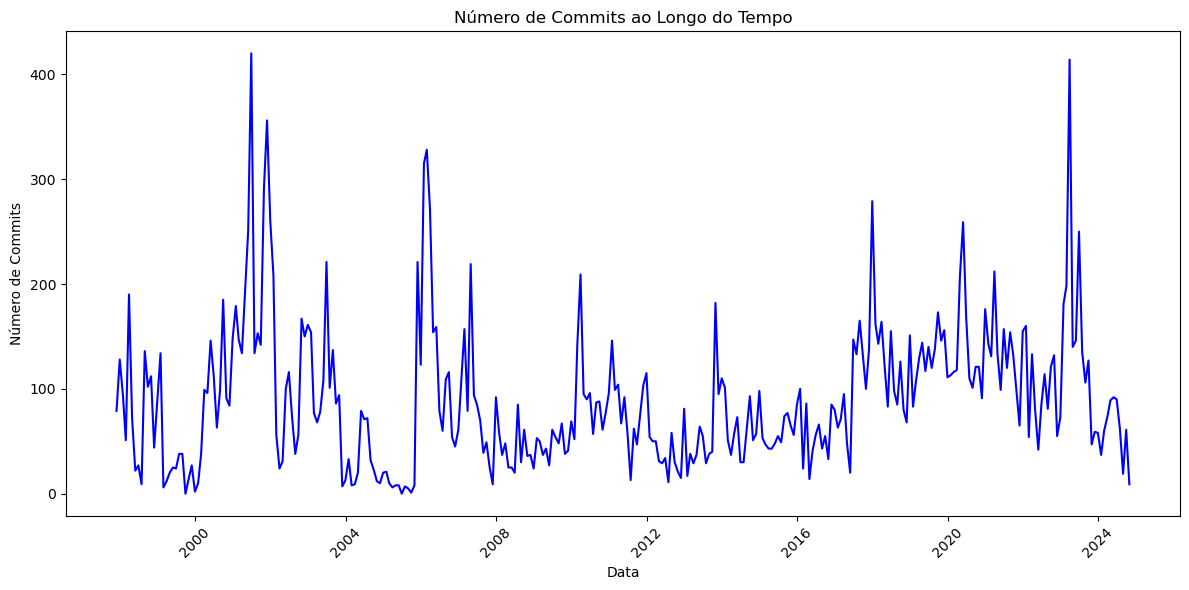

In [3]:
# Converter a coluna de data para datetime com timezone UTC
df_commits['author_date'] = pd.to_datetime(df_commits['author_date'], errors='coerce', utc=True)

# Remover linhas onde a conversão falhou (se houver)
df_commits = df_commits.dropna(subset=['author_date'])

# Definir a coluna de data como índice
df_commits.set_index('author_date', inplace=True)

# Agrupar por mês e contar o número de commits
monthly_pull_requests = df_commits.resample('M').size()

# Plotar o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_pull_requests.index, y=monthly_pull_requests.values, marker='', color='blue')
plt.title('Número de Commits ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Commits')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


0 valores inválidos em 'author_date'


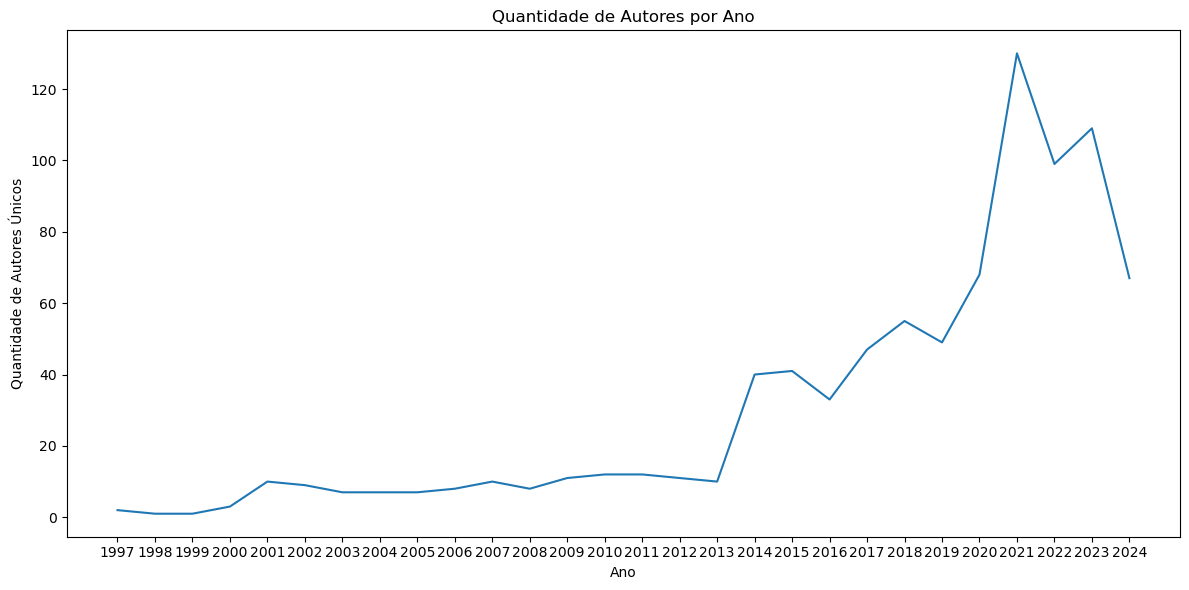

In [4]:
# Converter a coluna 'author_date' para datetime com fuso horário UTC
df_commits['author_date'] = pd.to_datetime(df_commits['author_date'], errors='coerce', utc=True)

# Verificar se há valores nulos após a conversão
print(df_commits['author_date'].isnull().sum(), "valores inválidos em 'author_date'")

# Remover linhas com valores inválidos (opcional)
df_commits = df_commits.dropna(subset=['author_date'])

# Extrair o ano da coluna 'author_date'
df_commits['year'] = df_commits['author_date'].dt.year

# Contar o número de autores únicos por ano
authors_per_year = df_commits.groupby('year')['author_email'].nunique()

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(authors_per_year.index, authors_per_year.values, marker='', linestyle='-')
plt.title('Quantidade de Autores por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Autores Únicos')
plt.xticks(authors_per_year.index)  # Garantir que todos os anos sejam mostrados no eixo X
plt.grid(False)
plt.tight_layout()

# Exibir o gráfico
plt.show()


0 valores inválidos em 'committer_date'


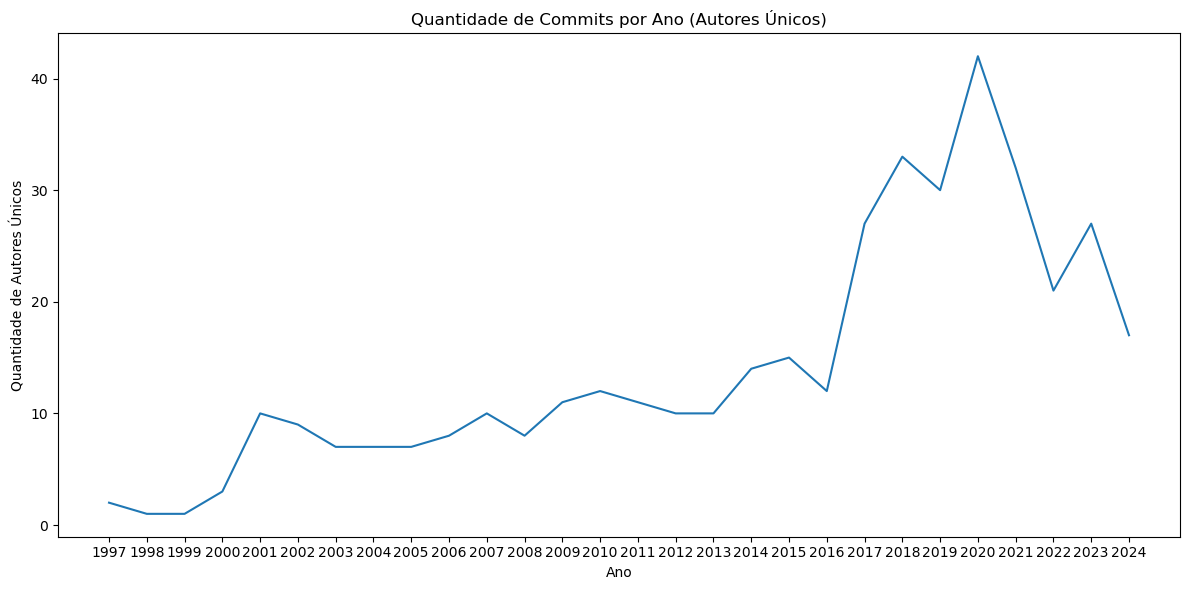

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter a coluna 'committer_date' para datetime com fuso horário UTC
df_commits['committer_date'] = pd.to_datetime(df_commits['committer_date'], errors='coerce', utc=True)

# Verificar se há valores nulos após a conversão
print(df_commits['committer_date'].isnull().sum(), "valores inválidos em 'committer_date'")

# Remover linhas com valores inválidos (opcional)
df_commits = df_commits.dropna(subset=['committer_date'])

# Extrair o ano da coluna 'committer_date'
df_commits['year'] = df_commits['committer_date'].dt.year

# Contar o número de autores (committer_email) únicos por ano
authors_per_year = df_commits.groupby('year')['committer_email'].nunique()

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(authors_per_year.index, authors_per_year.values, marker='', linestyle='-')
plt.title('Quantidade de Commits por Ano (Autores Únicos)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Autores Únicos')
plt.xticks(authors_per_year.index)  # Garantir que todos os anos sejam mostrados no eixo X
plt.grid(False)
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [1]:
2008

2008